In [1]:
import warnings
import os
import sys

warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))

sys.path.append(parent_dir)

In [2]:
from src.main.models.logistic import Logistic
from src.main.utilities.utils import get_dataset
from src.main.pipeline.functions import stop_words_removal, stemming, select_features, count_vectorizer, tfidf_transformer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
# define model and pipeline
logistic = Logistic(verbose=False, multi_class="multinomial", n_jobs=-1, max_iter=1000)
logistic.pipeline = [stop_words_removal, stemming, count_vectorizer]

# import dataset and apply pipeline
inputs, targets = get_dataset()
inputs = logistic.run_pipeline(inputs, save=True)

inputs = select_features(inputs, targets, k=10000)
inputs = tfidf_transformer(inputs)

In [4]:
# stratified train test split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42, stratify=targets)

In [ ]:
# model training 
search = logistic.grid_search(x_train, y_train, n_iter=1)
search.best_estimator_
# logistic.fit(x_train, y_train)

In [6]:
search.cv_results_
search.best_score_

0.8457212149208916

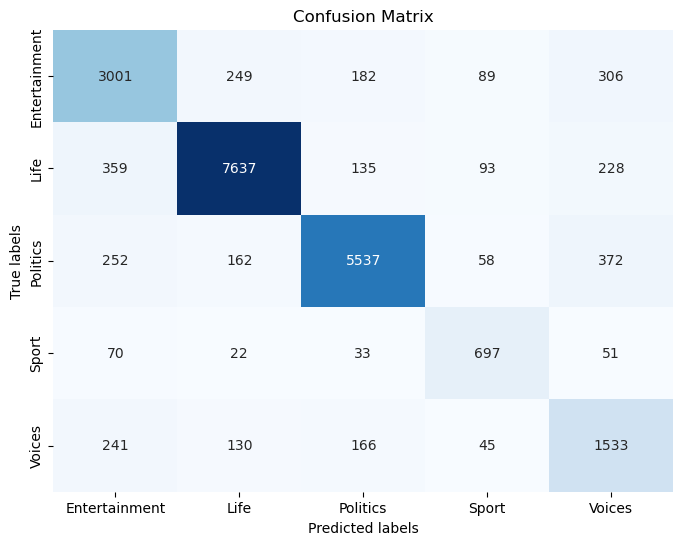

In [7]:
logistic.save_results(x_test, y_test)
